# <font color='blue'>Telecom Churn Case Study</font>
* Institution: IIIT, Bangalore and UpGrad
* Course: PG Diploma in Machine Lerning and AI March 2018
* Date: 13-Aug-2018
* Submitted by:
    1. Pandinath Siddineni (ID- APFE187000194)
    2. AKNR Chandra Sekhar
    3. Brajesh Kumar
    4. Shweta Tiwari
-----------------------------------

## <font color='blue'>Business Goals:</font>
1. Retaining high profitable customers is the number one business goal.
2. This project is based on the Indian and Southeast Asian market.
3. In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
4. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## <font color='blue'>Analysis Goals:</font>
1. Predict which customers are at high risk of churn
2. Build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
3. Prepaid is the most common model in India and southeast Asia. Focus on prepaid customers.
3. Curn definition used-- "Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time." In this project, we will use the usage-based definition to define churn.
4. In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.
5. especially high-value customers go through  three phases of customer lifecycle: a. The ‘good’ phase, b. The ‘action’ phase, c. The ‘churn’ phase

# <font color='blue'>PART 1: DATA CLEANING</font>

1. Understand the properties of loaded dataframe
2. Idnetify Uniquness key
3. Identify bad colums that has no infromation (all entries are null or same)
4. Data cleaning to string to numbers (e.g. less than 1 year, 10+ year,)
5. Remove columns with data that does not make much sense for our analysis
6. Missing value treatment: replace with '0', mean or median; drop rows; drop columns
7. Final data_frame for analysis: check for data total data loss 

In [1]:
# Import required libraries
import numpy as np
import pandas as pd

# Until fuction: line seperator
def print_ln():
    print('-'*80, '\n')

# Load csv data file
telecom = pd.read_csv('telecom_churn_data.csv', low_memory=False)

In [2]:
# 1. Understand the properties of loaded dataframe
print('Dataframe Shape: ', telecom.shape); print_ln();
print("Dataframe Info: \n"); telecom.info(); print_ln();
telecom.head(5)

Dataframe Shape:  (99999, 226)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
-------------------------------------------------------------------------------- 



,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


## Filter high-value customers

In [3]:
#2. Filter high-value customers
total_rech_amt_6_7 = (telecom["total_rech_amt_6"] + telecom["total_rech_amt_7"]) / 2.0
amont_70_pc = np.percentile(total_rech_amt_6_7, 70.0)
print('70 percentile of first two months avg recharge amount: ', amont_70_pc); print_ln();

telecom = telecom[total_rech_amt_6_7 >= amont_70_pc]
print('Dataframe Shape: ', telecom.shape); print_ln();

70 percentile of first two months avg recharge amount:  368.5
-------------------------------------------------------------------------------- 

Dataframe Shape:  (30011, 226)
-------------------------------------------------------------------------------- 



## Tag churners and remove attributes of the churn phase

In [4]:
# Identify Churn
X = telecom["total_ic_mou_9"] + telecom["total_og_mou_9"] + telecom["vol_2g_mb_9"] + telecom["vol_3g_mb_9"]
telecom["churn"] = np.where(X, 0, 1)
#telecom["churn"].head(30)

# Columns to be dropped: all columns ending with "_9"
drop_columns = []
drop_columns += ["mobile_number"]
drop_columns += ["sep_vbc_3g"]
drop_columns += [hdr for hdr in list(telecom) if hdr.endswith("_9")]
print('Total number of columns to drop  = ', len(drop_columns)); print_ln()

Total number of columns to drop  =  56
-------------------------------------------------------------------------------- 



## Identify columns that have no varience & Drop

In [5]:
# Identify columns that have no varience
telecom_unique_count = telecom.nunique().sort_values(ascending=False)
#print("Dataframe Unique Values: \n", telecom_unique_count); print_ln()

# Identify bad colums that has no infromation (all entries are NA or same)
# Find columns with all NULL entries and add to drop_columns list
telecom_unique_count_is_zero = telecom_unique_count[telecom_unique_count == 0]
print("Dataframe Unique Value Count is ZERO (all null values): \n", telecom_unique_count_is_zero); print_ln();
drop_columns += list(telecom_unique_count_is_zero.index)

# Find columns with all same entries and add to drop_columns list
telecom_unique_count_is_one = telecom_unique_count[telecom_unique_count == 1]
print("Dataframe Unique Value Count is ONE (all same values): \n", telecom_unique_count_is_one); print_ln();
drop_columns += list(telecom_unique_count_is_one.index)

print('Total number of columns to drop  = ', len(drop_columns))

Dataframe Unique Value Count is ZERO (all null values): 
 Series([], dtype: int64)
-------------------------------------------------------------------------------- 

Dataframe Unique Value Count is ONE (all same values): 
 last_date_of_month_8    1
circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
std_og_t2c_mou_6        1
last_date_of_month_9    1
std_og_t2c_mou_7        1
std_ic_t2o_mou_9        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_7        1
std_og_t2c_mou_9        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_6        1
dtype: int64
-------------------------------------------------------------------------------- 

Total number of columns to drop  =  72


In [6]:
# drop all identified columns
telecom.drop(drop_columns, axis=1, inplace=True)
print('Dataframe Shape: ', telecom.shape); print_ln();
print("Dataframe Info: \n"); telecom.info(); print_ln();
telecom.head(5) 

Dataframe Shape:  (30011, 158)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 158 entries, arpu_6 to churn
dtypes: float64(126), int32(1), int64(25), object(6)
memory usage: 36.3+ MB
-------------------------------------------------------------------------------- 



,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,NaN,1.0,1.0,315,21.03,910.65,122.16,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0,0,NaN,NaN,1.0,2607,0.00,0.00,0.00,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0,0,NaN,NaN,NaN,511,0.00,2.45,21.89,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0,0,NaN,NaN,NaN,667,0.00,0.00,0.00,0


# Reduce numbner of features
- LASSO / RIDGE
- PCA
- RFE
- ELASTIC NET
- DECISSION CLASSIFIER (FORREST TREE)

In [7]:
# # 4. Data cleaning to string to numbers (e.g. less than 1 year, 10+ year,) 
# #telecom = telecom_backup.copy() 
# #-------------------------------------------------------------------------------
# # COLUMN 'term': remove non numeric charectors "months" and convert to int
# print(telecom['term'].dtype)
# if telecom['term'].dtype == object: 
#     telecom['term'] = telecom.term.str.extract('(\d+)', expand=False).astype(int)

# #-------------------------------------------------------------------------------
# # COLUMN 'int_rate': remove % and covert to float
# if telecom['int_rate'].dtype == object: 
#     telecom['int_rate'] = telecom.int_rate.str.extract('(\d+)', expand=False).astype(float)

# #-------------------------------------------------------------------------------
# # COLUMN 'revol_util': remove % and convert to float
# # Null value treatment: after discussing with domain expert, we decided to replace them with 0
# if telecom['revol_util'].dtype == object: 
#     telecom['revol_util'] = telecom.revol_util.fillna("0").str.extract('(\d+)', expand=False).astype(float)

# #-------------------------------------------------------------------------------
# # COLUMN 'emp_length': remove non numeric charectors
# # Null value treatment: after discussing with domain expert, we decided to replace median
# # 0-1 yrs  =  0
# # 1-2 yrs  =  1
# # 2-3 yrs  =  2
# # .............
# # 9-10 yrs =  9
# # 10+ yrs  = 10
# # n/a      = median (choosen median as it represent better approximation)

# #print(telecom['emp_length'].unique()); print_ln()
# if telecom['emp_length'].dtype == object: 
#     telecom['emp_length'] = telecom.emp_length.str.extract('(\d+)', expand=False)
#     #print(telecom['emp_length'].median()); print_ln()
#     telecom['emp_length'] = telecom['emp_length'].fillna(telecom.emp_length.median()).astype(int)
#     #print(telecom['emp_length'].unique()); print_ln()
#     #print(telecom['emp_length'].describe()); print_ln()
#     #print(telecom['emp_length'].median()); print_ln()
    
# #-------------------------------------------------------------------------------
# # COLUMN 'last_pymnt_amnt': has mixed data type conver all to float
# telecom['last_pymnt_amnt'] = telecom['last_pymnt_amnt'].astype(float)

# print(telecom[['term', 'int_rate', 'revol_util', 'emp_length']].head(10))

In [8]:
# # 5. Remove columns with data that does not make much sense for our analysis
# # FINDINGS: resons for dropping columns
# # COLUMN 'desc': running text & date- no meaningful insigth
# # COLUMN 'emp_title': shows address, names, description and does not give any meaningful insight
# # COLUMN 'title': contians numbers, year, date, telecom type, amount- no meaningful insigth
# drop_columns = ['desc', 'emp_title', 'title']
# telecom.drop(drop_columns, axis=1, inplace=True)

# print('Dataframe Shape: ', telecom.shape); print_ln();
# print("Dataframe Info: \n"); telecom.info(); print_ln();
# telecom.head(5) 

In [9]:
# # 6. Missing Value Treatment
# #print("\nCount null values in each column: \n", telecom.isnull().sum()); print_ln()
# print("\n% of null values in each column: \n", round(100*(telecom.isnull().sum()/len(telecom.index)), 2)); print_ln()

# # drop COLUMN 'mths_since_last_record' with 94.64% missing values
# telecom.drop('mths_since_last_record', axis=1, inplace=True)

# # drop COLUMN 'next_pymnt_d' with 97.07% missing values
# telecom.drop('next_pymnt_d', axis=1, inplace=True)

# # remove ROW with null values (0.18%) for 'last_pymnt_d'
# telecom = telecom[~telecom['last_pymnt_d'].isnull()]

# # remove ROW with null values (0.01%) for 'last_credit_pull_d'
# telecom = telecom[~telecom['last_credit_pull_d'].isnull()]

# # remove ROW with null values (1.75%) for 'pub_rec_bankruptcies'
# # check unique values
# print(telecom['pub_rec_bankruptcies'].unique()); print_ln()
# telecom = telecom[~telecom['pub_rec_bankruptcies'].isnull()]

# #print("\n% of Null values in each column: \n", round(100*(telecom.isnull().sum()/len(telecom.index)), 2)); print_ln()

# print("\nNull values in each row: ", telecom.isnull().all(axis=1).sum()); print_ln()
# print('Dataframe Shape: ', telecom.shape); print_ln();
# print("\n% of Null values in each column: \n", round(100*(telecom.isnull().sum()/len(telecom.index)), 2)); print_ln()
# telecom.head(5) 


In [10]:
# # write treated telecom file
telecom.to_csv("telecom_churn_data_clean.csv", sep=',', index=False)

In [11]:
list(telecom)

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [12]:
#analysis of total_rech_num_6
telecom["total_rech_num_6"][:30]

7       5
8      19
13      6
16     10
17     19
21     22
24      5
33      7
38     27
41      4
48     13
53     24
56     12
57     10
60      7
61     15
69     16
73     33
74      7
77      4
87     10
92     11
96      8
97     14
101    13
102     4
103     8
105     7
111    12
115     6
Name: total_rech_num_6, dtype: int64

# checking for imbalanced or balanced data set

In [98]:
#checking whether data is imbalanced or not
df_not_churn=telecom[telecom["churn"]==1]
df_not_churn["churn"].value_counts()
#df_churn.head()

1    2593
Name: churn, dtype: int64

In [99]:
#checking whether data is imbalanced or not
df_churn=telecom[telecom["churn"]==0]
df_churn["churn"].value_counts()
#df_churn.head()

0    27418
Name: churn, dtype: int64

so we have skewed data set

# Analysis on  'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
3C2=3 combination of scatter plot

In [106]:
#claculation of mean for churn or non churn
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_6"]))
print(np.mean(df_churn["total_rech_num_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_6"]))
print(np.median(df_churn["total_rech_num_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_6"],np.arange(0,100,25)))

Mean:
14.364057076745082
11.909220220293237
median:
11.0
9.0
Quantiles:
[  0.   7.  11.  18.]
[  0.   6.   9.  15.]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


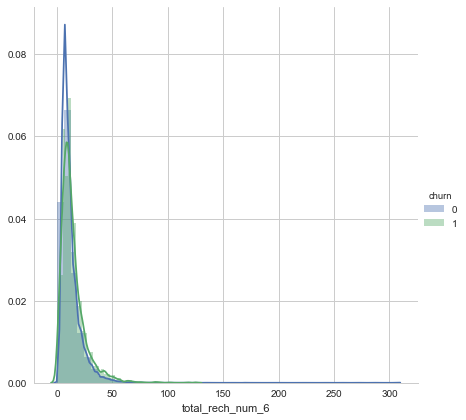

In [37]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_num_6").add_legend()
plt.show()

#its difficult to know about the churning rate based on total_rech_num_6 feature as overlaped data.

In [109]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_7"]))
print(np.mean(df_churn["total_rech_num_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_7"]))
print(np.median(df_churn["total_rech_num_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_7"],np.arange(0,100,25)))

Mean:
11.612032394909372
11.941972426872857
median:
9.0
9.0
Quantiles:
[  0.   5.   9.  15.]
[  0.   6.   9.  15.]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


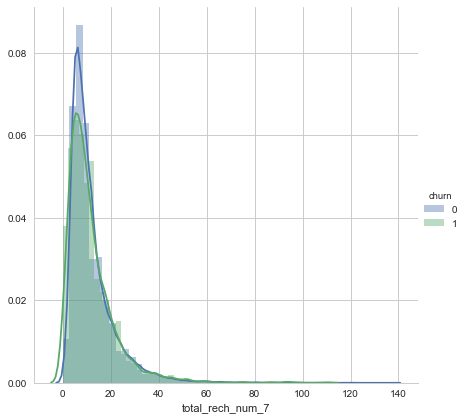

In [38]:
#feature importance of total_rech_data_7
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_num_7").add_legend()
plt.show()

#its difficult to know about the churning rate based on total_rech_data_7 feature as overlaped data.

In [110]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_8"]))
print(np.mean(df_churn["total_rech_num_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_8"]))
print(np.median(df_churn["total_rech_num_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_8"],np.arange(0,100,25)))

Mean:
5.541843424604705
10.668247136917353
median:
4.0
8.0
Quantiles:
[ 0.  2.  4.  7.]
[  0.   5.   8.  13.]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


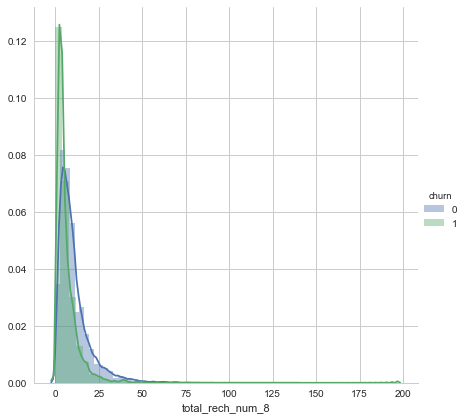

In [39]:
#feature importance of total_rech_amt_8
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_num_8").add_legend()
plt.show()


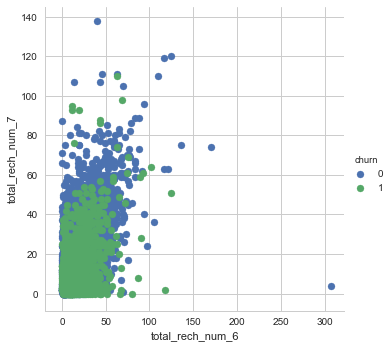

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_7").add_legend()
plt.show()

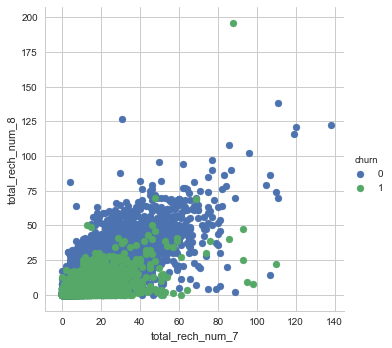

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_num_7","total_rech_num_8").add_legend()
plt.show()

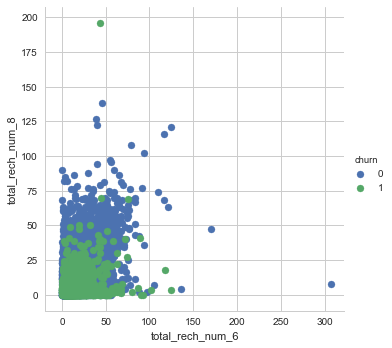

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_8").add_legend()
plt.show()

# Analysis on 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',

In [111]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_6"]))
print(np.mean(df_churn["total_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_6"]))
print(np.median(df_churn["total_rech_amt_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_6"],np.arange(0,100,25)))

Mean:
808.4411878133436
686.861113137355
median:
686.0
576.5
Quantiles:
[   0.  476.  686.  979.]
[   0.   430.   576.5  821. ]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


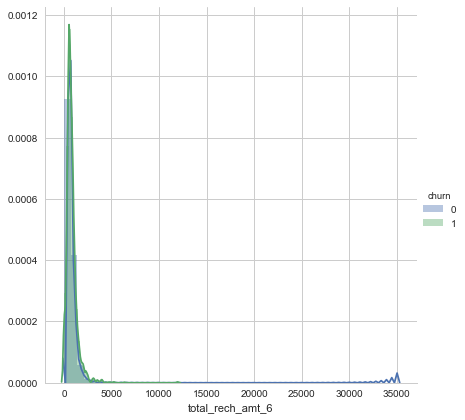

In [44]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_amt_6").add_legend()
plt.show()

In [112]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_7"]))
print(np.mean(df_churn["total_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_7"]))
print(np.median(df_churn["total_rech_amt_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_7"],np.arange(0,100,25)))

Mean:
637.9460084843811
701.4497045736377
median:
536.0
586.0
Quantiles:
[   0.  316.  536.  825.]
[   0.  432.  586.  836.]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


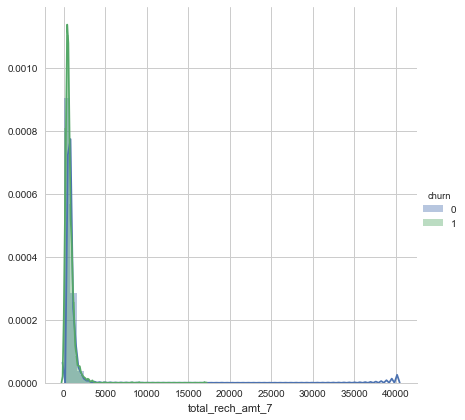

In [45]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_amt_7").add_legend()
plt.show()

In [113]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_8"]))
print(np.mean(df_churn["total_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_8"]))
print(np.median(df_churn["total_rech_amt_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_8"],np.arange(0,100,25)))

Mean:
258.8468954878519
647.1925012765337
median:
62.0
544.0
Quantiles:
[   0.    0.   62.  378.]
[   0.  350.  544.  810.]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


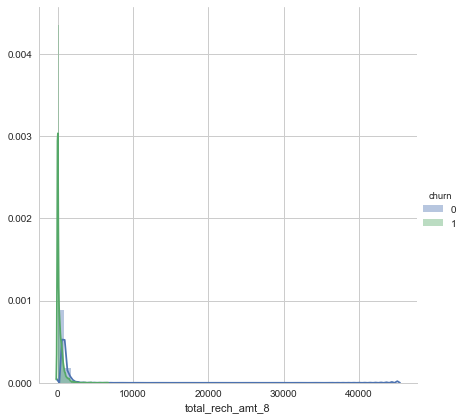

In [46]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_amt_8").add_legend()
plt.show()

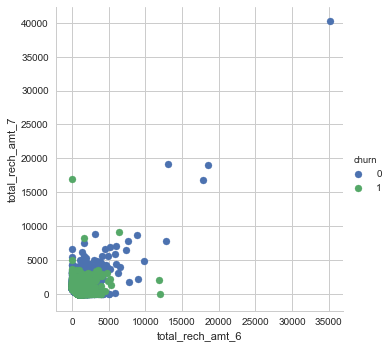

In [47]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_7").add_legend()
plt.show()

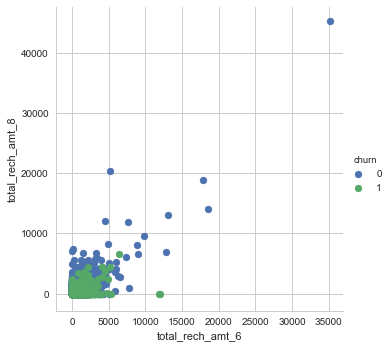

In [48]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_8").add_legend()
plt.show()

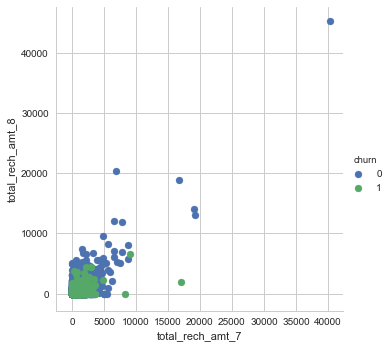

In [52]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_amt_7","total_rech_amt_8").add_legend()
plt.show()

# analysis on max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',

In [114]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_6"]))
print(np.mean(df_churn["max_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_6"]))
print(np.median(df_churn["max_rech_amt_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_6"],np.arange(0,100,25)))

Mean:
166.56691091399924
171.87245605076956
median:
110.0
120.0
Quantiles:
[   0.  100.  110.  154.]
[   0.  110.  120.  200.]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


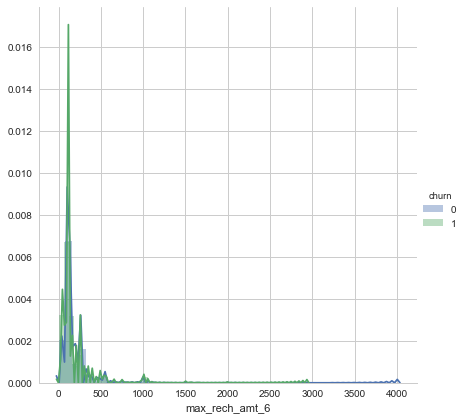

In [54]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_amt_6").add_legend()
plt.show()

In [115]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_7"]))
print(np.mean(df_churn["max_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_7"]))
print(np.median(df_churn["max_rech_amt_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_7"],np.arange(0,100,25)))

Mean:
156.5996914770536
177.46374644394194
median:
110.0
128.0
Quantiles:
[   0.   50.  110.  145.]
[   0.  110.  128.  200.]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


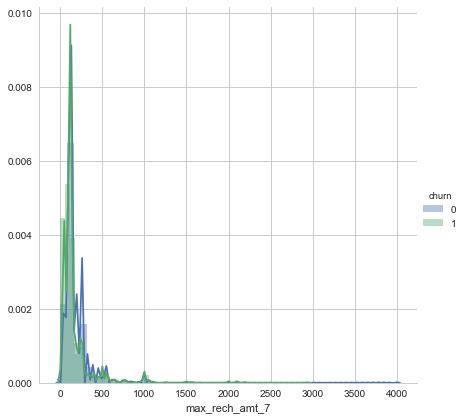

In [55]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_amt_7").add_legend()
plt.show()

In [116]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_8"]))
print(np.mean(df_churn["max_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_8"]))
print(np.median(df_churn["max_rech_amt_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_8"],np.arange(0,100,25)))

Mean:
84.19359814886232
170.30994237362316
median:
30.0
130.0
Quantiles:
[   0.    0.   30.  130.]
[   0.  100.  130.  198.]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


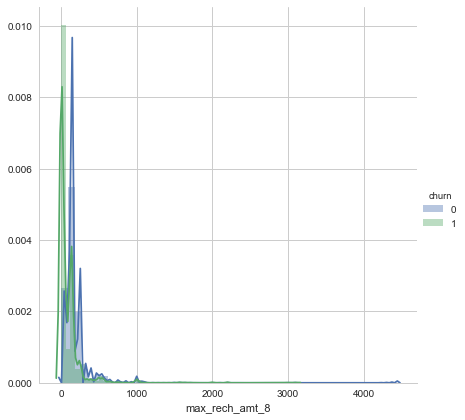

In [56]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_amt_8").add_legend()
plt.show()

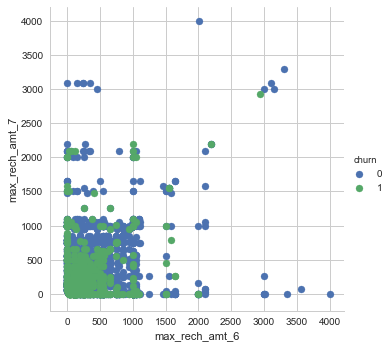

In [57]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_7").add_legend()
plt.show()

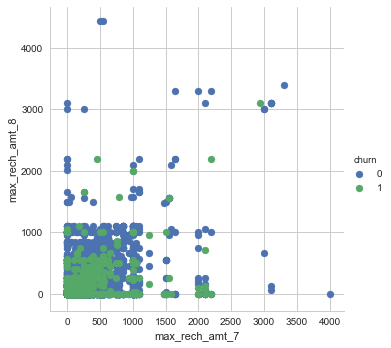

In [58]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_amt_7","max_rech_amt_8").add_legend()
plt.show()

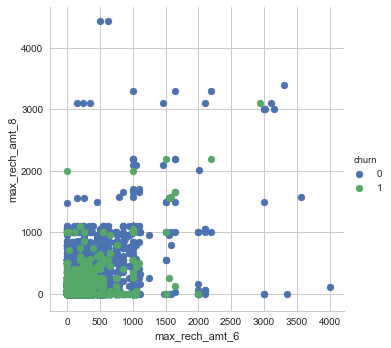

In [59]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_8").add_legend()
plt.show()

# analysis on  'total_rech_data_6','total_rech_data_7' 'total_rech_data_8',

In [118]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_data_6"]))
print(np.mean(df_churn["total_rech_data_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_data_6"]))
print(np.median(df_churn["total_rech_data_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_data_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_data_6"],np.arange(0,100,25)))

Mean:
2.6595174262734584
2.4540418740024412
median:
nan
nan
Quantiles:
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


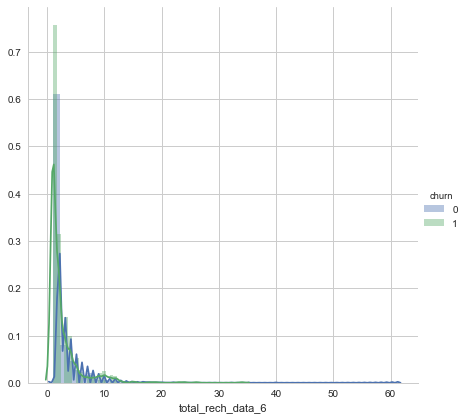

In [60]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_data_6").add_legend()
plt.show()

In [119]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_data_7"]))
print(np.mean(df_churn["total_rech_data_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_data_7"]))
print(np.median(df_churn["total_rech_data_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_data_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_data_7"],np.arange(0,100,25)))

Mean:
2.930817610062893
2.6994376927262835
median:
nan
nan
Quantiles:
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


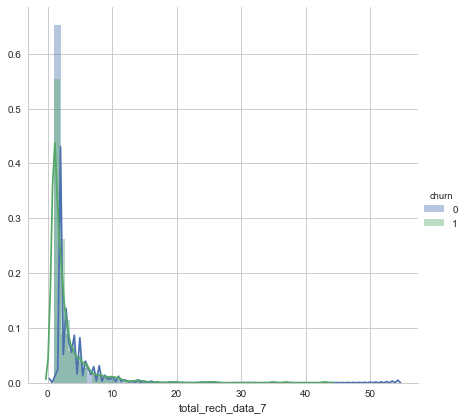

In [61]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_data_7").add_legend()
plt.show()

In [120]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_data_8"]))
print(np.mean(df_churn["total_rech_data_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_data_8"]))
print(np.median(df_churn["total_rech_data_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_data_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_data_8"],np.arange(0,100,25)))

Mean:
2.1149425287356323
2.6594774679992987
median:
nan
nan
Quantiles:
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


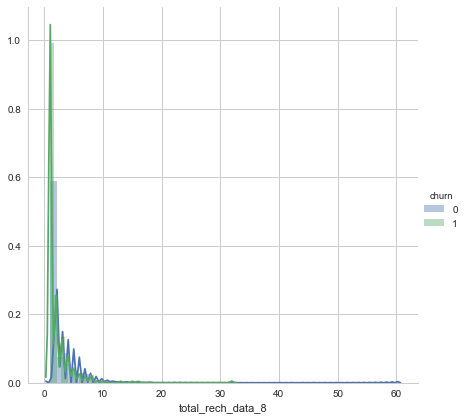

In [62]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_data_8").add_legend()
plt.show()

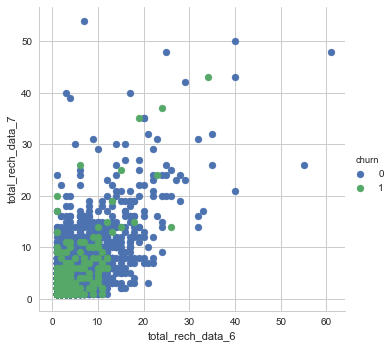

In [63]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_data_6","total_rech_data_7").add_legend()
plt.show()

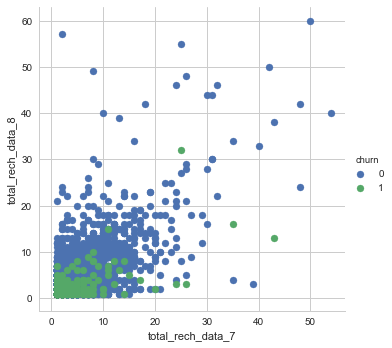

In [64]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_data_7","total_rech_data_8").add_legend()
plt.show()

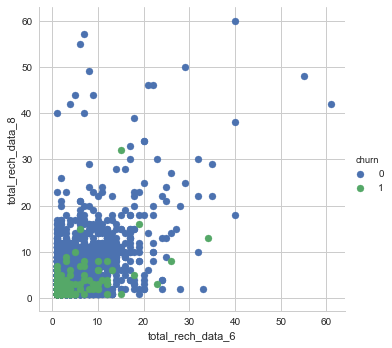

In [65]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_data_6","total_rech_data_8").add_legend()
plt.show()

# analysis on max_rech_data_6', 'max_rech_data_7',  'max_rech_data_8',

In [121]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_data_6"]))
print(np.mean(df_churn["max_rech_data_6"]))
print("median:")
print(np.median(df_not_churn["max_rech_data_6"]))
print(np.median(df_churn["max_rech_data_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_data_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_data_6"],np.arange(0,100,25)))

Mean:
145.97319034852546
150.12862642005445
median:
nan
nan
Quantiles:
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


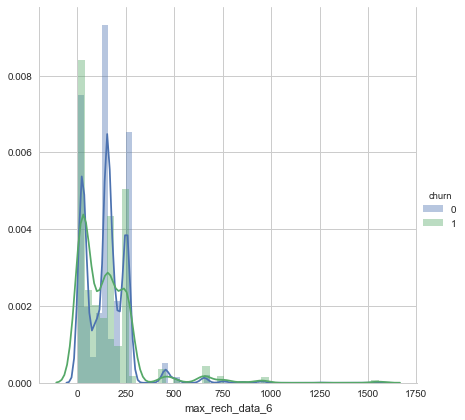

In [66]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_data_6").add_legend()
plt.show()

In [122]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_data_7"]))
print(np.mean(df_churn["max_rech_data_7"]))
print("median:")
print(np.median(df_not_churn["max_rech_data_7"]))
print(np.median(df_churn["max_rech_data_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_data_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_data_7"],np.arange(0,100,25)))

Mean:
148.79088050314465
151.1330491565391
median:
nan
nan
Quantiles:
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


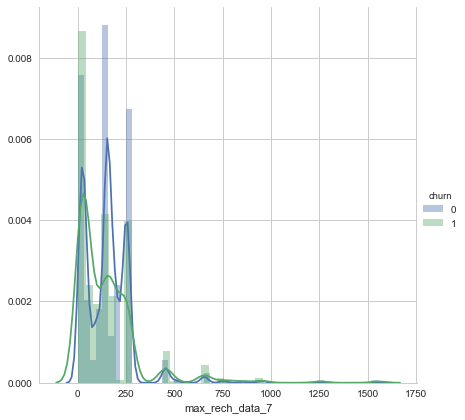

In [67]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_data_7").add_legend()
plt.show()

In [123]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_data_8"]))
print(np.mean(df_churn["max_rech_data_8"]))
print("median:")
print(np.median(df_not_churn["max_rech_data_8"]))
print(np.median(df_churn["max_rech_data_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_data_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_data_8"],np.arange(0,100,25)))

Mean:
107.11781609195403
142.1245835525162
median:
nan
nan
Quantiles:
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


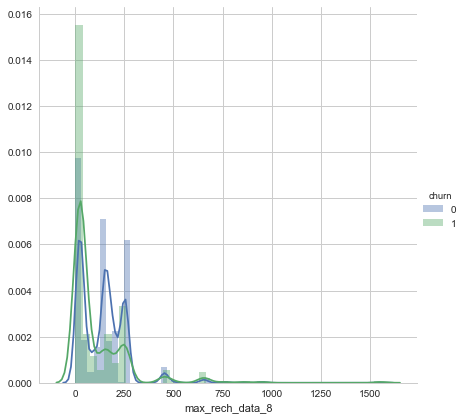

In [68]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_data_8").add_legend()
plt.show()

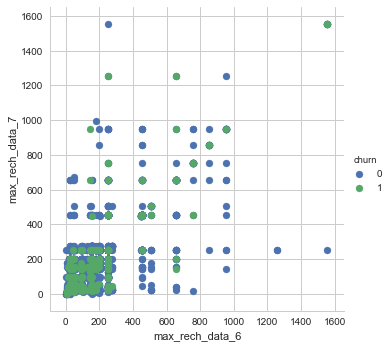

In [69]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_data_6","max_rech_data_7").add_legend()
plt.show()

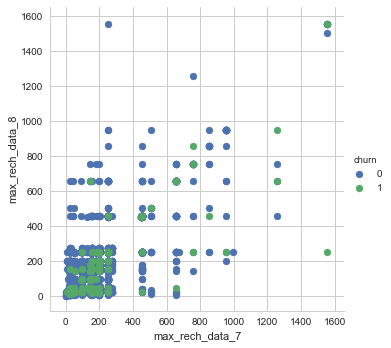

In [70]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_data_7","max_rech_data_8").add_legend()
plt.show()

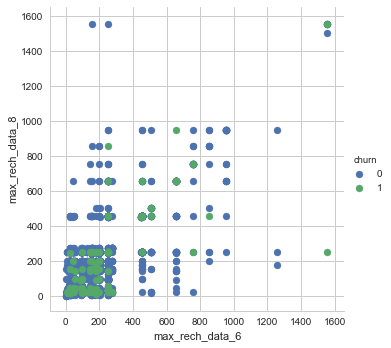

In [71]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_data_6","max_rech_data_8").add_legend()
plt.show()

# analysis on 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',

C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


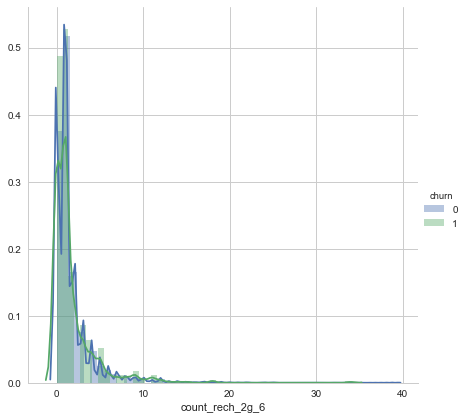

In [72]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"count_rech_2g_6").add_legend()
plt.show()

C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


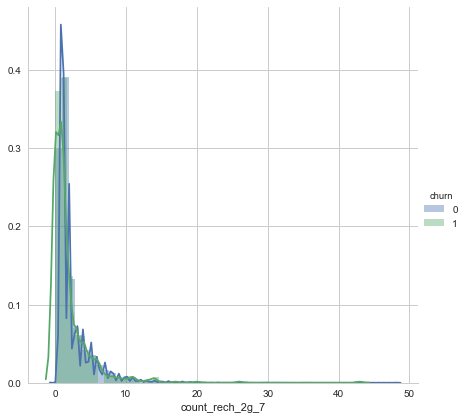

In [73]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"count_rech_2g_7").add_legend()
plt.show()

C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


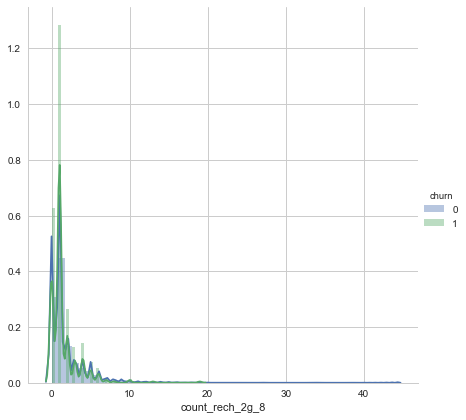

In [74]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"count_rech_2g_8").add_legend()
plt.show()

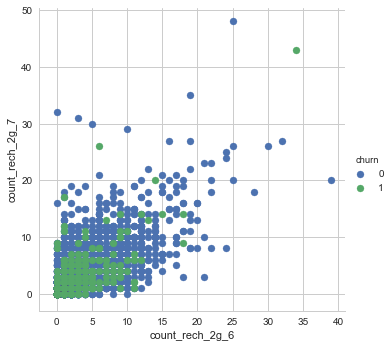

In [75]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"count_rech_2g_6","count_rech_2g_7").add_legend()
plt.show()

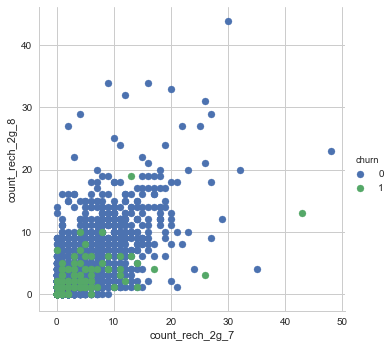

In [77]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"count_rech_2g_7","count_rech_2g_8").add_legend()
plt.show()

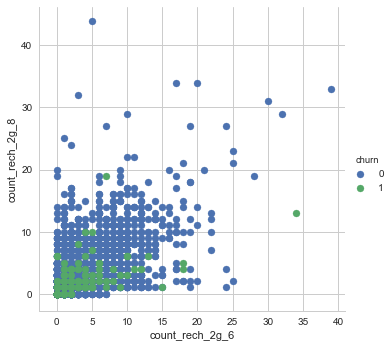

In [78]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"count_rech_2g_6","count_rech_2g_8").add_legend()
plt.show()

# analysis on count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',

In [125]:
print("Mean:")
print(np.mean(df_not_churn["count_rech_3g_6"]))
print(np.mean(df_churn["count_rech_3g_6"]))
print("median:")
print(np.median(df_not_churn["count_rech_3g_6"]))
print(np.median(df_churn["count_rech_3g_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["count_rech_3g_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["count_rech_3g_6"],np.arange(0,100,25)))

Mean:
0.9316353887399463
0.8133508590742653
median:
nan
nan
Quantiles:
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


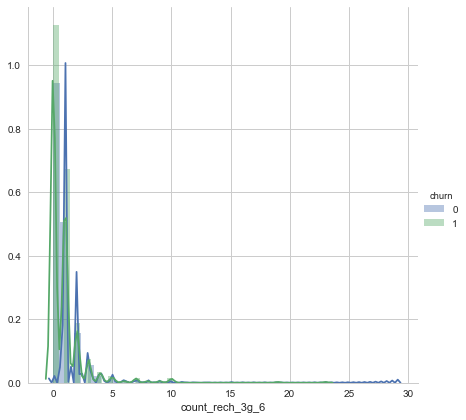

In [79]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"count_rech_3g_6").add_legend()
plt.show()

In [126]:
print("Mean:")
print(np.mean(df_not_churn["count_rech_3g_7"]))
print(np.mean(df_churn["count_rech_3g_7"]))
print("median:")
print(np.median(df_not_churn["count_rech_3g_7"]))
print(np.median(df_churn["count_rech_3g_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["count_rech_3g_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["count_rech_3g_7"],np.arange(0,100,25)))

Mean:
1.0031446540880504
0.8548884454924723
median:
nan
nan
Quantiles:
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


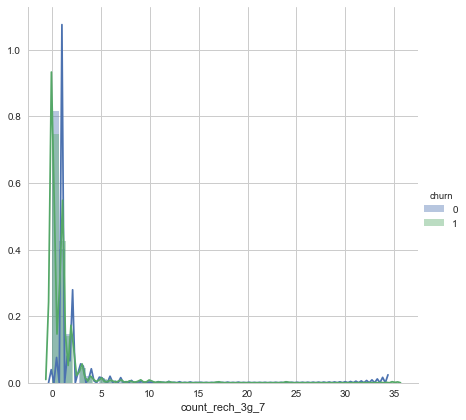

In [80]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"count_rech_3g_7").add_legend()
plt.show()

In [127]:
print("Mean:")
print(np.mean(df_not_churn["count_rech_3g_8"]))
print(np.mean(df_churn["count_rech_3g_8"]))
print("median:")
print(np.median(df_not_churn["count_rech_3g_8"]))
print(np.median(df_churn["count_rech_3g_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["count_rech_3g_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["count_rech_3g_8"],np.arange(0,100,25)))

Mean:
0.5833333333333334
0.8073820796072243
median:
nan
nan
Quantiles:
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


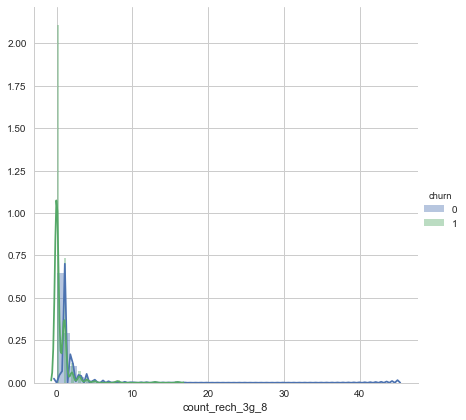

In [128]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"count_rech_3g_8").add_legend()
plt.show()

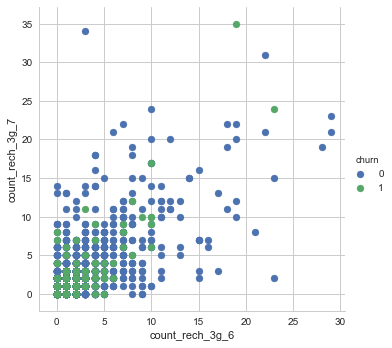

In [129]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"count_rech_3g_6","count_rech_3g_7").add_legend()
plt.show()

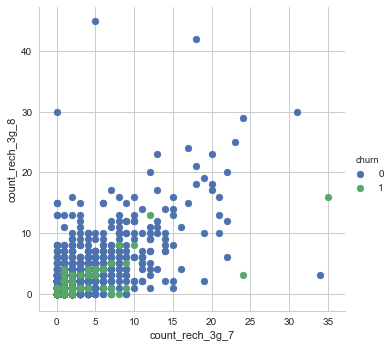

In [130]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"count_rech_3g_7","count_rech_3g_8").add_legend()
plt.show()

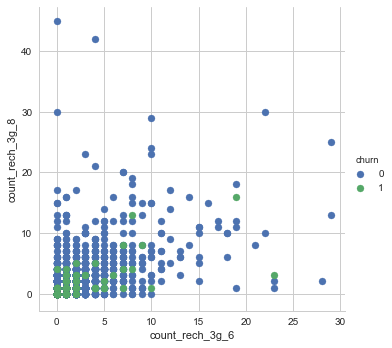

In [131]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"count_rech_3g_6","count_rech_3g_8").add_legend()
plt.show()

# analysis  'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8',

In [133]:
print("Mean:")
print(np.mean(df_not_churn["av_rech_amt_data_6"]))
print(np.mean(df_churn["av_rech_amt_data_6"]))
print("median:")
print(np.median(df_not_churn["av_rech_amt_data_6"]))
print(np.median(df_churn["av_rech_amt_data_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["av_rech_amt_data_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["av_rech_amt_data_6"],np.arange(0,100,25)))

Mean:
227.85187667560322
239.6832823209088
median:
nan
nan
Quantiles:
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


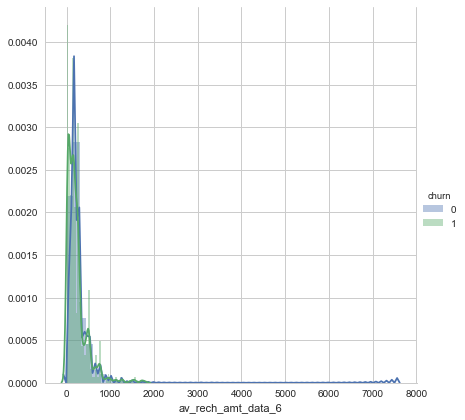

In [134]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"av_rech_amt_data_6").add_legend()
plt.show()

In [135]:
print("Mean:")
print(np.mean(df_not_churn["av_rech_amt_data_7"]))
print(np.mean(df_churn["av_rech_amt_data_7"]))
print("median:")
print(np.median(df_not_churn["av_rech_amt_data_7"]))
print(np.median(df_churn["av_rech_amt_data_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["av_rech_amt_data_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["av_rech_amt_data_7"],np.arange(0,100,25)))

Mean:
236.589748427673
251.85658625068018
median:
nan
nan
Quantiles:
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


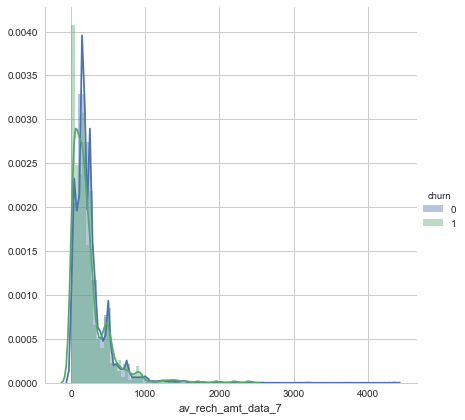

In [86]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"av_rech_amt_data_7").add_legend()
plt.show()

In [136]:
print("Mean:")
print(np.mean(df_not_churn["av_rech_amt_data_8"]))
print(np.mean(df_churn["av_rech_amt_data_8"]))
print("median:")
print(np.median(df_not_churn["av_rech_amt_data_8"]))
print(np.median(df_churn["av_rech_amt_data_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["av_rech_amt_data_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["av_rech_amt_data_8"],np.arange(0,100,25)))

Mean:
151.41905172413794
231.5602796773628
median:
nan
nan
Quantiles:
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


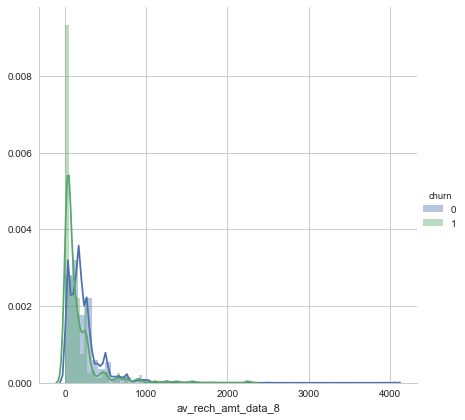

In [87]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"av_rech_amt_data_8").add_legend()
plt.show()

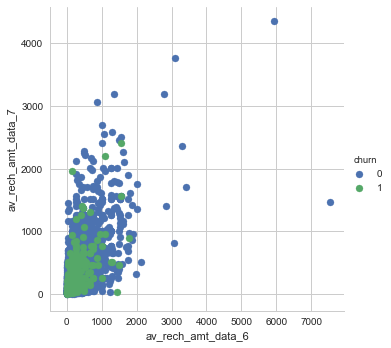

In [88]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"av_rech_amt_data_6","av_rech_amt_data_7").add_legend()
plt.show()

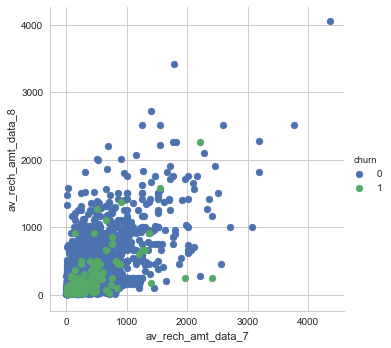

In [89]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"av_rech_amt_data_7","av_rech_amt_data_8").add_legend()
plt.show()

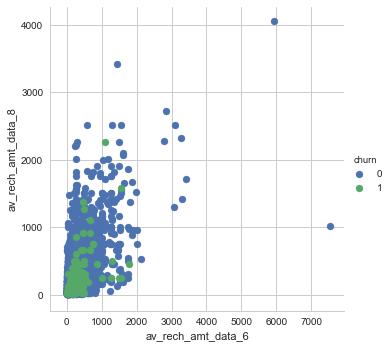

In [91]:
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"av_rech_amt_data_6","av_rech_amt_data_8").add_legend()
plt.show()